In [70]:
# See why it is required on mac, but isn't on pc.
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [71]:
import cv2

from MagicPoint.dataset.artificial_dataset import *
from MagicPoint.dataset.dataset_pipeline import parse_primitives, photometric_augmentation, homographic_augmentation
from common.utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
config = load_config('../configs/config_toy.yaml')
data_config = config['data']
experiment_config = config['experiment']


In [73]:
set_seed(experiment_config['seed'])

data_config['augmentation']['photometric']['enable'] = False
data_config['augmentation']['homographic']['enable'] = False

trainDataset = ArtificialDataset(TRAINING, data_config)


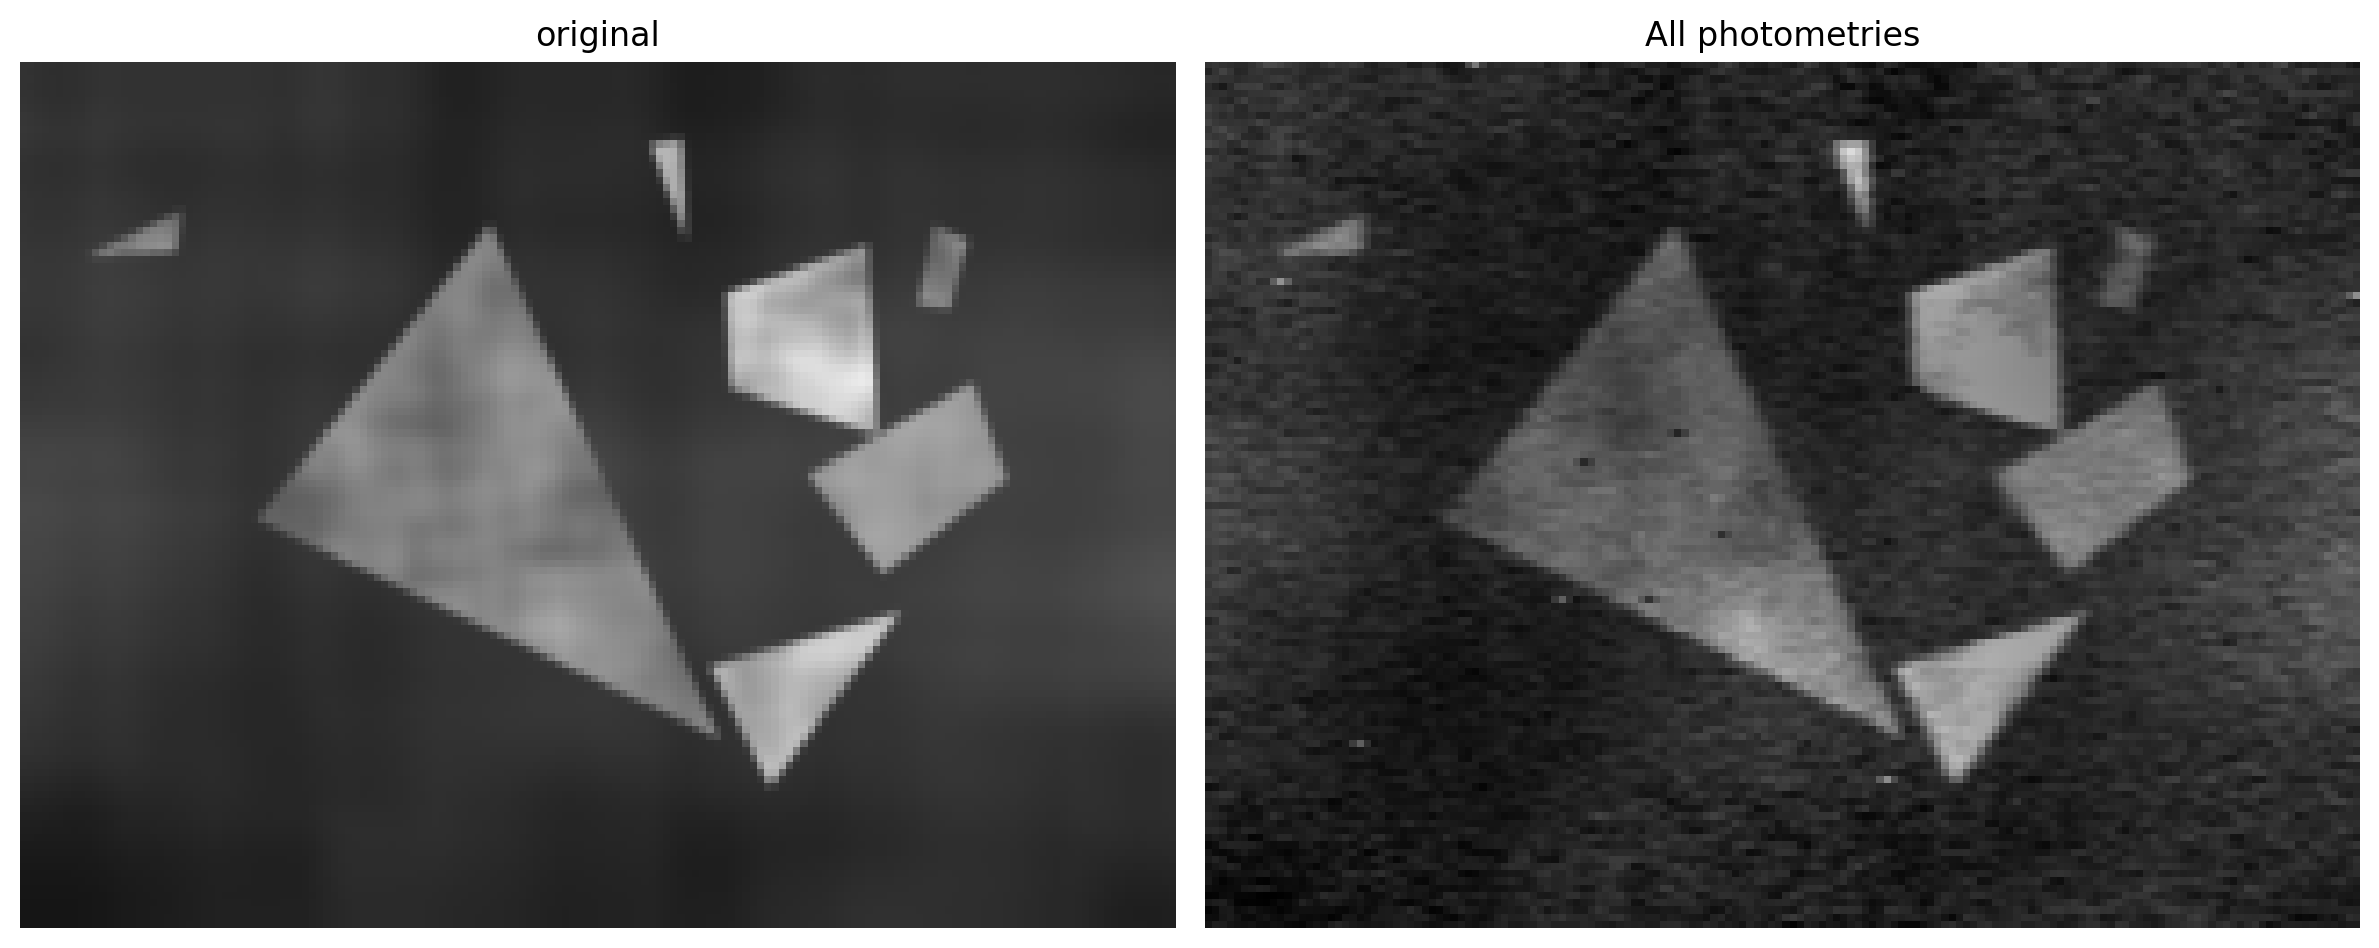

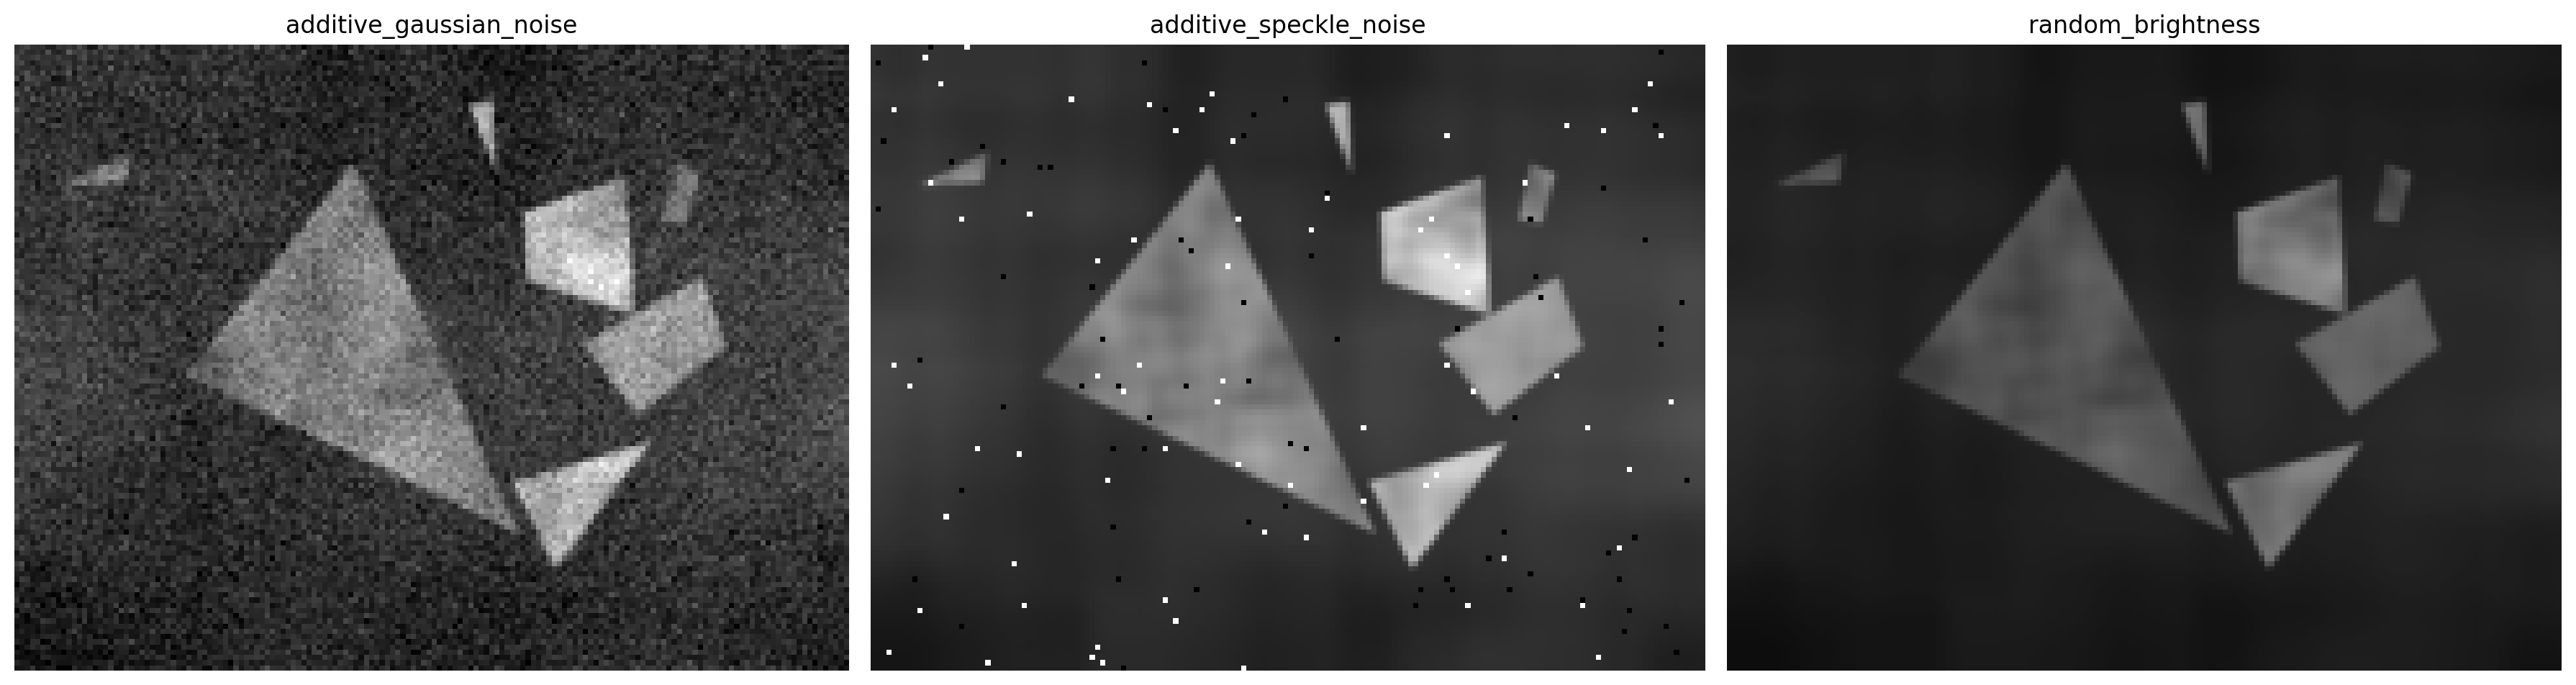

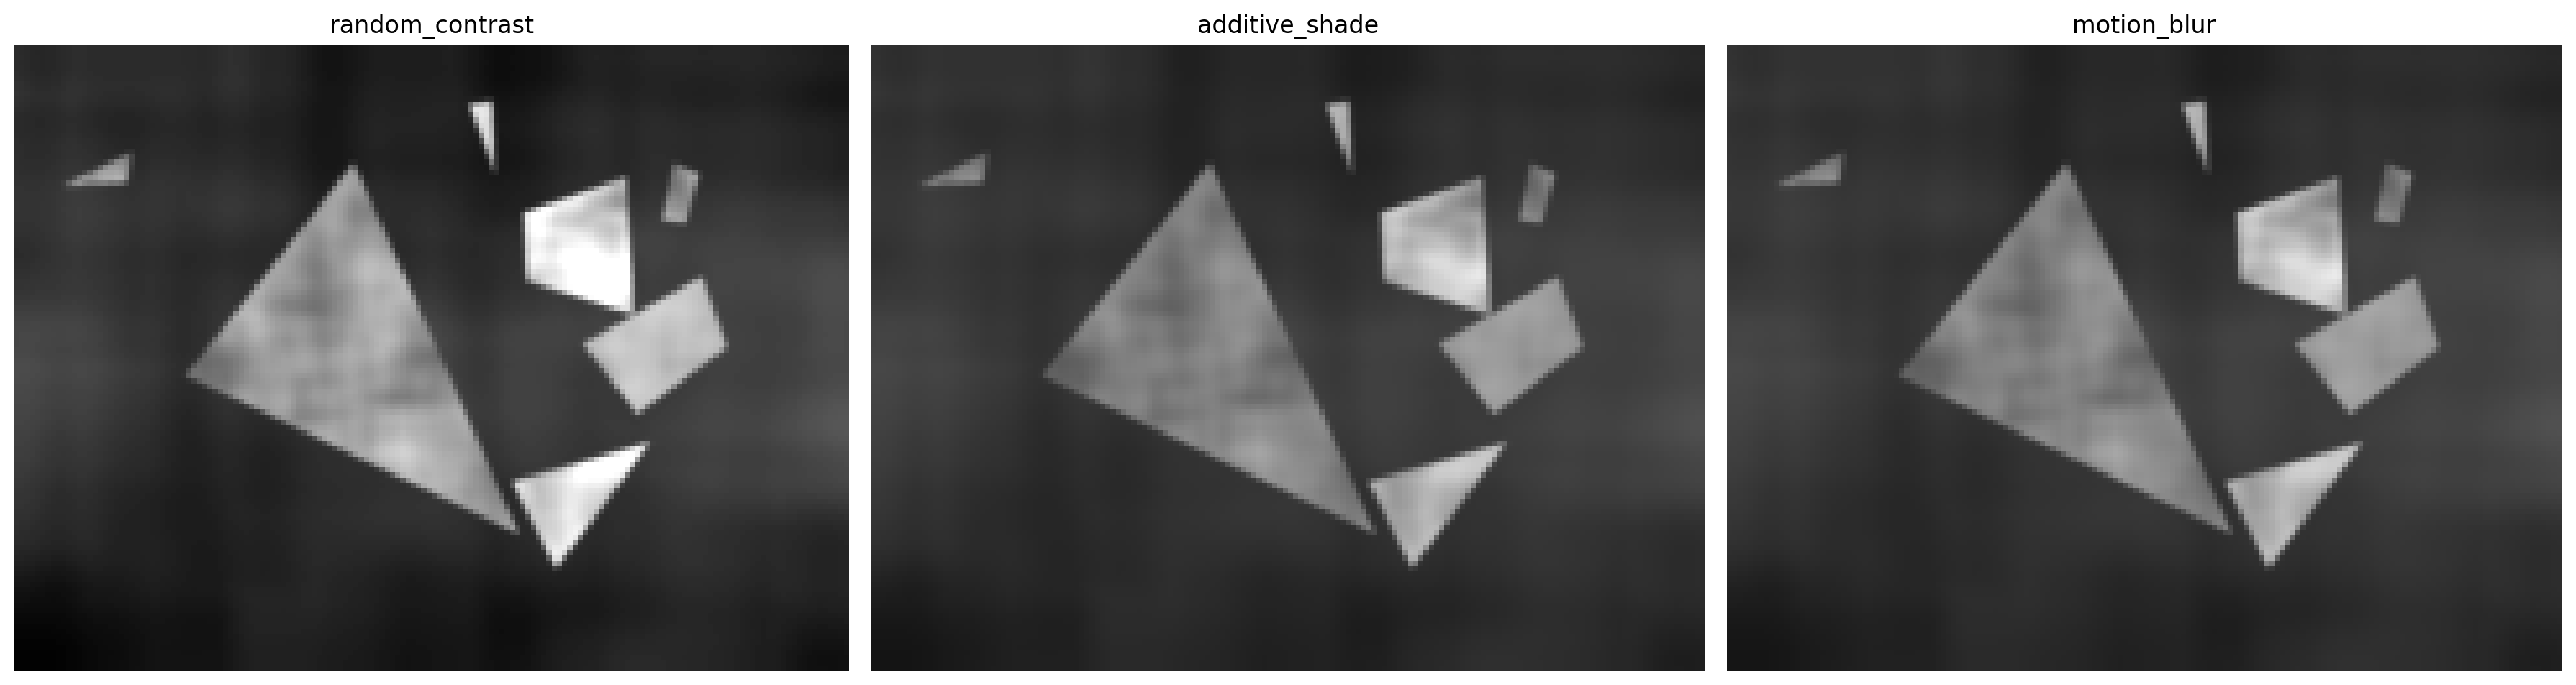

In [74]:
# Photometric augmentation visualization

rows = 1

for _ in range(rows):
    index = np.random.randint(0, trainDataset.__len__())
    item = trainDataset.__getitem__(index)
    
    grayscale_image = to255scale(rgb2grayscale(item[IMAGE]))
    
    all_grayscale = photometric_augmentation(grayscale_image, data_config)
    
    frames = [rgb2gbr(grayscale2rgb(grayscale_image)), 
              rgb2gbr(grayscale2rgb(all_grayscale))]
    
    plot_images(frames, titles=['original', 'All photometries'], dpi=200)
    
    frames = []
    
    primitives = parse_primitives(data_config['primitives'], photometries.augmentations)
    prim_configs = [data_config['augmentation']['photometric']['params'].get(p, {}) for p in primitives]
    
    for p, c in zip(primitives, prim_configs):
        photometried = getattr(photometries, p)(grayscale_image, c)
        frames.append(rgb2gbr(grayscale2rgb(photometried)))
        
    plot_images(frames[:3], titles=primitives[:3], dpi=200)
    plot_images(frames[3:], titles=primitives[3:], dpi=200)


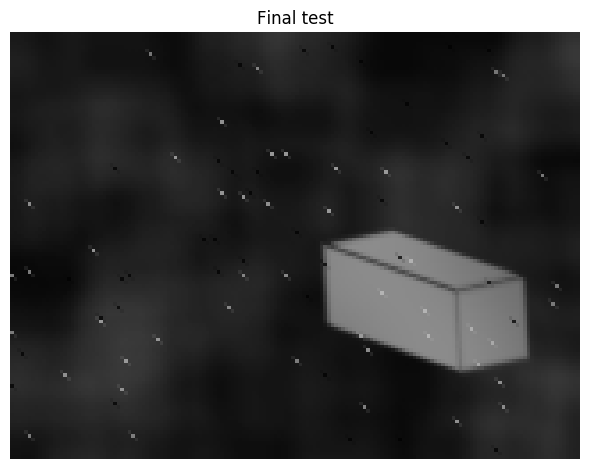

In [78]:
data_config['augmentation']['photometric']['enable'] = True
data_config['augmentation']['homographic']['enable'] = False

trainPhoto = ArtificialDataset(TRAINING, data_config)

index = np.random.randint(0, trainDataset.__len__())
item = trainPhoto.__getitem__(index)
plot_images([rgb2gbr(to255scale(item[IMAGE]))], ["Final test"])


In [79]:
# Homographic augmentation visualization
# 
# for _ in range(rows):
#     data = train_dataset.__getitem__(np.random.randint(0, train_dataset.__len__()))
#     image = data[0]
#     image_channel = image[0] * 255
#     
#     frames = [image.transpose((1, 2, 0))]
#     
#     warped_image, warped_points = homographic_augmentation(image_channel, data[1], data_config['augmentation']['homographic'])
#     
#     frame_warped_points = [cv2.KeyPoint(c[1], c[0], 1) for c in warped_points]
#     frames.append(cv2.drawKeypoints(warped_image.astype(np.uint8), frame_warped_points, None, color=(0, 255, 0)))
#     
#     warped_image /= 255.
#     warped_image = np.stack((warped_image,) * 3, axis=0)
#     
#     frames.append(warped_image.transpose((1, 2, 0)))
#     
#     plot_images(frames, dpi=200)


In [80]:
# data_config['augmentation']['photometric']['enable'] = False
# data_config['augmentation']['homographic']['enable'] = True
# 
# trainHomo = ArtificialDataset(TRAINING, data_config)